In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import numpy as np

In [6]:
cancer = load_breast_cancer()

In [7]:
print(cancer.data.shape)

(569, 30)


In [9]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 40))
noise.shape

(569, 40)

In [10]:
X_w_noise = np.hstack( [cancer.data, noise] )
X_w_noise.shape

(569, 70)

In [11]:
X = X_w_noise
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0,
                                                   test_size = 0.3,
                                                   stratify = y)

In [12]:
select = SelectPercentile(score_func = f_classif,
                         percentile = 50)

select.fit(X_train, y_train)

# 학습세트에 적용
X_train_selected = select.transform(X_train)

print("X_train shape", X_train.shape)
print("X_train_selectied shape", X_train_selected.shape)

X_train shape (398, 70)
X_train_selectied shape (398, 35)


In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성 사용(학습) : {:.3f}".format(lr.score(X_train, y_train)))
print("전체 특성 사용(테스트) : {:.3f}".format(lr.score(X_test, y_test)))

전체 특성 사용(학습) : 0.962
전체 특성 사용(테스트) : 0.912


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성 사용(학습) : {:.3f}".format(lr.score(X_train, y_train)))
print("전체 특성 사용(테스트) : {:.3f}".format(lr.score(X_test, y_test)))

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("전체 특성 사용(학습) : {:.3f}".format(knn.score(X_train, y_train)))
print("전체 특성 사용(테스트) : {:.3f}".format(knn.score(X_test, y_test)))

전체 특성 사용(학습) : 0.962
전체 특성 사용(테스트) : 0.912
전체 특성 사용(학습) : 0.945
전체 특성 사용(테스트) : 0.912


In [16]:
import matplotlib.pyplot as plt

[ True  True  True  True  True  True  True  True  True False  True False
  True  True False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False  True  True False False False False False  True  True False False
 False False False  True False False False False False  True  True False
  True False False False False False False False False  True]
(171, 35)
일부 특성 사용(학습) : 0.970
일부 특성 사용(테스트): 0.930


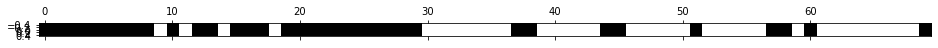

In [17]:
## X_train_selected
select = SelectPercentile(score_func=f_classif,
                          percentile=50)
select.fit(X_train, y_train)

### 학습 세트에 적용
X_train_selected = select.transform(X_train)

mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

X_test_selected = X_test[ :  , mask ]

print(X_test_selected.shape)
lr.fit(X_train_selected, y_train)
print("일부 특성 사용(학습) : {:.3f}".format(lr.score(X_train_selected, y_train)))
print("일부 특성 사용(테스트): {:.3f}".format(lr.score(X_test_selected, y_test)))

In [18]:
from sklearn.feature_selection import SelectFromModel #모델 기반 특성 선택
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                         threshold="median")

In [19]:
select.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

In [20]:
X_train_l1 = select.transform(X_train)

print("X_train.shape :" , X_train.shape)
print("X_train_l1.shape :", X_train_l1.shape)

X_train.shape : (398, 70)
X_train_l1.shape : (398, 35)


In [22]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False  True False False False False
  True  True False False False  True False False False False False False
 False False False False False False False False  True False False False
 False False False False  True False False False False False]


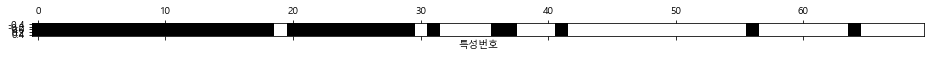

In [23]:
mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap="gray_r")
plt.xlabel("특성번호")

X_test_l1 = X_test[: , mask]

In [24]:
# X_train_l1, X_test_l1
lr = LogisticRegression()
lr.fit(X_train_l1, y_train)

print("전체 특성 사용(학습) : {:.3f}".format(lr.score(X_train_l1, y_train)))
print("전체 특성 사용(테스트) : {:.3f}".format(lr.score(X_test_l1, y_test)))

전체 특성 사용(학습) : 0.957
전체 특성 사용(테스트) : 0.924


#### 일변량 통계를 이용한 변수 선택
 * 통계 F-value를 이용
  * select = SelectPercentile(score_func=f_classif, percentile=50)
   * 분류 : t_classif
   * 호귀 : f_regression
    
#### 모델 기반 변수 선택
 * 모델을 기반으로 변수를 선택
  * RandomForestClassifier를 이용한다고 하면,
   * 기준이 되는 값은 특성 중요도
    * 특성 중요도 : 모델을 만들 대, 사용된 변수를 말한다.
     * select = SelectFromModel(RandomForestClassifier(), threshold="median")